In [1]:
import torch
import matplotlib.pyplot as plt

from BayesianOpt.model import ExactRBFModel, NoisyRBFModel, HomoRBFModel
from BayesianOpt.model import ExactGPModel
from BayesianOpt.utils import tkwargs, from_unit_box
from BayesianOpt.problem import Simple

In [2]:
RANDOM_SEED = 47
torch.manual_seed(RANDOM_SEED)

In [3]:
prob = Simple(
    ndim=1,
)

In [4]:
model = ExactGPModel(
    ndim=prob.ndim,
    lb=prob.lb,
    ub=prob.ub,
    interpolant=True,
)

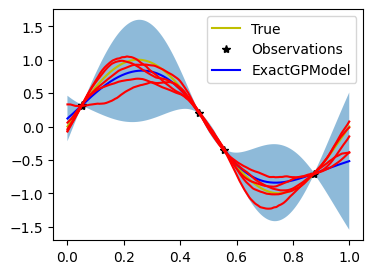

In [5]:
true_x = torch.unsqueeze(torch.linspace(prob.lb[0], prob.ub[0], 10000), dim=1).to(**tkwargs)
true_y = prob.eval(true_x)

train_x = torch.unsqueeze(from_unit_box(torch.rand(5), prob.lb, prob.ub), dim=1).to(**tkwargs)
train_y = prob.eval(train_x)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.plot(torch.squeeze(true_x).numpy(), torch.squeeze(true_y).numpy(), "y-", label="True")
model.add_points(train_x, train_y)
model.plot(ax=ax, bound=True, sample=5)

ax.legend()
plt.show()